# Introduction to clustering
**Clustering techniques aim at organising unlabeled observations based on their similarity into a finite number of groups.** Clustering is an unsupervised learning technique that is common for a large range of statistical applications. 

While other data science methods were introduced earlier in this class (e.g., during the workshops on "Innovation in engineering, robotics, remote sensing and computing"), we will analyse clustering here in the context on farming systems research. It is however important to understand that clustering (and closely related data science methods) have many applications in digital agricutlure and are not exclusively applied for farming systems research. Your ability to gain knowledge of data science methods can thus benefit you across a wide range of topics.

## Problem description: Identifying similar types of farming systems

In the tutorial of last class you manually grouped a small number of farms into different farm types. Such **expert-/theory-driven classification** required you as a researcher to select a small number of priority variables (i.e., dimensions) that were used as a main basis for the classification.

Some of you also decided to define **nested-classifications** (i.e., first classify by the variable of largest importance; then make sub-groups for a variable of secondary importance, and so forth). This approach has the disadvantage of generating a very high number of groups (as many as the combination of all categorical - or categorized continuous - variable values). Often, it is however considered more informative to classify farms into a comparably smaller number of groups.

When it is necessary to equally consider a large number of dimensions as basis for classifying farms into groups, manual classification becomes thus infeasible (due to the multi-dimensionality of the task). **Statistical clustering methods** provide an alternative to manual / expert-driven classification.

In [1]:
# Import software packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels
from sklearn.cluster import (KMeans, AgglomerativeClustering)
from sklearn.preprocessing import StandardScaler
import scipy
from ISLP import load_data
from ISLP.cluster import compute_linkage

## A) Clustering low-dimensional data 

### A.1) A basic example
Let us start by a very simple example that easily illustrates the basic logic of clustering via statistical methods. The first clustering method that we will use is **k-means clustering**. 

For k-means clustering we need to specify upfront in how many groups we would like to split the data. The k-means algorithm then identifies an according number of groups of datapoints that are similar to one-another. 

Consider the dataset displayed here below. It consists of only two variables (dimension1 & dimension2). When you scroll through the data, you will see that it is easy to group the 50 observations into two groups: The first 25 values clearly differ from the latter 25 values.

Let us test if k-means clustering manages to pick up this clear difference and correctly classifies the dataset into the two distinct groups.

In [2]:
# Generating trial dataset
np.random.seed(0);
X = np.random.standard_normal((50,2));
X[:25,0] += 3;
X[:25,1] -= 4;

X_df = pd.DataFrame({'dimension1': X[:, 0], 'dimension2': X[:, 1]})
X_df

,dimension1,dimension2
0,4.764052,-3.599843
1,3.978738,-1.759107
2,4.867558,-4.977278
3,3.950088,-4.151357
4,2.896781,-3.589401
5,3.144044,-2.545726
6,3.761038,-3.878325
7,3.443863,-3.666326
8,4.494079,-4.205158
9,3.313068,-4.854096


To conduct the k-means clustering we will utilise the **"KMeans"** function from the **scikit-learn** software-package.  

In our example, we specify the following inputs to the KMeans function:

- **n_clusters**: The number of clusters in which we want that data to be divided into. Here, we would like **two groups** to be generated.
- **init**: The method used for the selection of the initial cluster centroids. We will stick with the default method, the so called “greedy k-means++”.
- **n_init**: Number of times the k-means algorithm is run with different centroid seeds. Here, we will always use 20. As our datasets are very simple, this parameter should be of low relevance but is important when dealing with sparse high-dimensional problems.
- **random_state**: A seed/parameter that controls the random number generator and accordingly makes the exact solution reproducible.
- **target dataset**: Lastly, we need to specify the target dataset that shall be classified into groups as part of the **.fit()** attribute


In [3]:
# conducting k-means clustering into 2 groups
kmeans_X = KMeans(n_clusters=2,
                init='k-means++',
                n_init=20,
                random_state=2).fit(X)

We can now inspect the results: The generated **kmeans cluster** has a property called **"labels_"** that shows the groups in which each of the 50 observations has been classified. 
- we can either look at the results in numerical terms for all the 50 observations (groups are identified here as '0' or '1')
- or we can plot the results

In [4]:
kmeans_X.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1])

In [5]:
X_df_classified = pd.DataFrame({'dimension1': X[:, 0], 'dimension2': X[:, 1], 'class': kmeans_X.labels_})
X_df_classified

,dimension1,dimension2,class
0,4.764052,-3.599843,0
1,3.978738,-1.759107,0
2,4.867558,-4.977278,0
3,3.950088,-4.151357,0
4,2.896781,-3.589401,0
5,3.144044,-2.545726,0
6,3.761038,-3.878325,0
7,3.443863,-3.666326,0
8,4.494079,-4.205158,0
9,3.313068,-4.854096,0


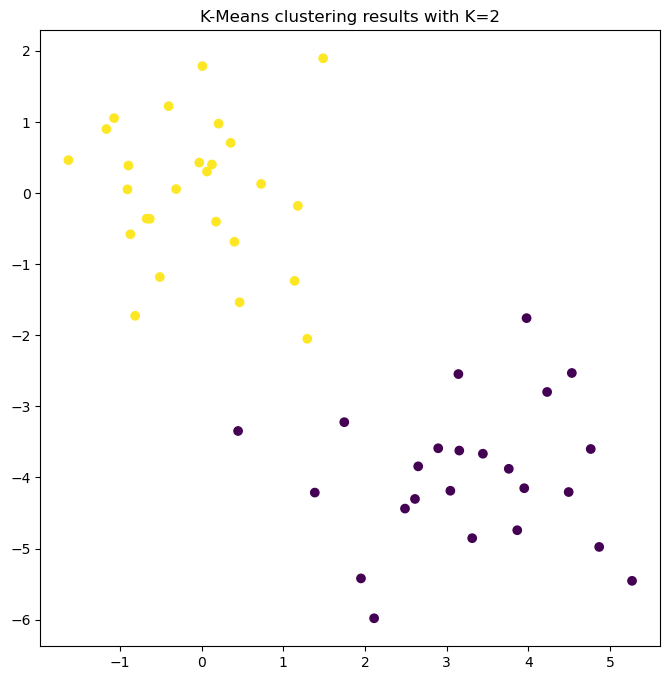

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
ax.scatter(X[:,0], X[:,1], c=kmeans_X.labels_)
ax.set_title("K-Means clustering results with K=2");

### Student question
In our trial example we perfectly know that the first 25 observations have originated from a different data generation mechansim than the latter 25 observations.
- **Q1:** Inspect the above table and corresponding graph: How accurately did the k-means clustering divide the 50 observations into the known two groups?
- **Q2:** What does this tell us about the k-means algorithm and statistical clustering methods in general? What can they do and what not?

<details>
    <summary>Click <font color="red"><b>here</b></font> to reveal the answer!</summary>
    
We can see that the k-means clustering (largely) correctly identified the two groups of data:
- The values of the yellow dots spread on both dimensions across the typical range of the standard normal distribution.
- The values of the violet points have instead been scaled to range across a different centrepoint (3,-4).

We can also note one single anomaly: The point with the index value 21 and the coordinate values (1.29, -2.05) was categorised by the k-means algorithm to belong to the yellow group. Instead - since we generated the data ourselves - we know that it has been generated by subjecting it to scaling (by adding 3 to the first and subtracting 4 from the second dimension) and should thus belong to the violet group.  
This highlights an important point: Clustering methods only judge datapoints based on the observed values, but do not know anything about the actual "Data Generation Mechanism". In fact, when you look for the point (1.29, -2.05) in the above figure, you will see that it is located on the boundary between both groups: It is little evident in which of the two groups it more likely belongs.
Accordingly, when the objective is to make statements beyond the observed data variables - e.g. about unobserved, latent characteristics such as the data generating mechanism - one should be aware about the possibility of incorrect classification results. After all, this is a probabilistic exercise at heart.
</details>

### A.2) Low-dimensional farm data
Let us now try to cluster a very simple farm dataset that:

- has very few dimensions (i.e., three variables), and
- only contains few observations.

Remember: We are still able to easily categorise such a simple dataset into groups by our own judgment, but the groups created do usually strongly differ based on who does the grouping (due to different underlying reasoning).

In [7]:
# Generating the farm dataset (low-dimensional)
farm_data_dct = {
    'climateZone': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1], # consider e.g.: 0 - Temperate dry; 1 - Temperate wet
    'farmSize': [100, 100, 150, 150, 600, 600, 100, 100, 150, 150, 600, 600],
    'livestockHeads': [150, 200, 200, 150, 500, 500, 150, 200, 200, 150, 500, 500],
}

farm_data_df = pd.DataFrame(data=farm_data_dct)
farm_data_df

,climateZone,farmSize,livestockHeads
0,0,100,150
1,0,100,200
2,0,150,200
3,0,150,150
4,0,600,500
5,0,600,500
6,1,100,150
7,1,100,200
8,1,150,200
9,1,150,150


## Student exercise
Follow the example code further above and cluster the farm data into 2 groups. Use the below cell to insert your code.

In [8]:
# conducting k-means clustering of farm-data into 2 groups (student exercise: enter code in this cell)


(Unhide the cell below to view the solution: -> click on the three dots.)

In [9]:
# conducting k-means clustering into 2 groups
kmeans_cl2 = KMeans(n_clusters=2,
                init='k-means++',
                n_init=20,
                random_state=2).fit(farm_data_df)

Now, let us inspect the solution. Again, we will have a look at the categorisation in numerical and graphical terms.

In [27]:
# add classification results to dataframe
farm_data_df_classified = pd.DataFrame(data=farm_data_dct)
farm_data_df_classified['class_2'] = list( kmeans_cl2.labels_ )
farm_data_df_classified

,climateZone,farmSize,livestockHeads,class_2
0,0,100,150,1
1,0,100,200,1
2,0,150,200,1
3,0,150,150,1
4,0,600,500,0
5,0,600,500,0
6,1,100,150,1
7,1,100,200,1
8,1,150,200,1
9,1,150,150,1


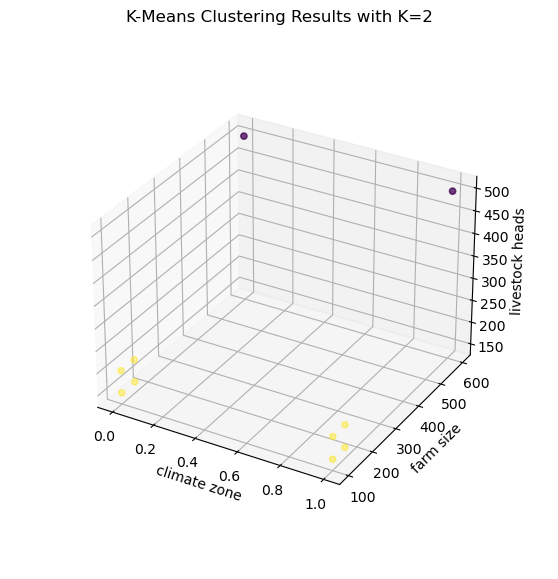

In [11]:
# 3D plot of clustered farm-data
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(farm_data_df.to_numpy()[:,0], farm_data_df.to_numpy()[:,1], farm_data_df.to_numpy()[:,2], marker='o', c=kmeans_cl2.labels_, alpha=0.5)

ax.set_xlabel('climate zone')
ax.set_ylabel('farm size')
ax.set_zlabel('livestock heads')
ax.set_title("K-Means Clustering Results with K=2")

ax.set_box_aspect(aspect=None, zoom=0.8)

#plt.tight_layout()
#plt.show()

### Student question
Interpret the solution:
- Describe the two groups in which the dataset has been divided? 
- What are the main differences between them?
- Is it a good choice to separate the dataset into two groups? If not: How many groups would you suggest to use (in other words: how many groups is too little, how many groups is too many for the given dataset)?

<details>
    <summary>Click <font color="red"><b>here</b></font> to reveal the answer!</summary>

When requiring the k-means algorithm to find two different clusters, it suggests that the biggest difference is between  
- farms that have a comparably small farm size of 100 or 150 ha and comparably fewer cattle of 150-200 heads, versus
- farms that have a comparably larger farm size of 600 ha and comparably more cattle of 500 heads.

Instead, the clustering method decided not to make any difference between those farms that can be found in different climate zones. Overall, it is not too informative to simply separate the dataset into two groups only: It does not make us aware of any main difference that we were not able to quickly pick up by ourselves. Let us investigate how the results change if we cluster into larger numbers of groups.
    
Deciding on the most suitable number of groups can only be discussed if we would define the specific objective of our analysis (which we did not specify here in this exercise context). However, two groups is little informative as stated above. On the other hand, if groups only have very few members or are no longer clearly distinguishable, it is not informative neither. In the given context, any number between 2-5 groups can probably provide some insight (with 3 or 4 groups possibly the most popular choices).
</details>

In the following, we repeat the clustering exercise using 3 & 4 groups.

In [17]:
# k-means clustering: 3 clusters
kmeans_cl3 = KMeans(n_clusters=3,
                random_state=2,
                n_init=20).fit(farm_data_df)

# k-means clustering: 4 clusters
kmeans_cl4 = KMeans(n_clusters=4,
                random_state=2,
                n_init=20).fit(farm_data_df)

# add classification results to dataframe
farm_data_df_classified['class_3'] = list( kmeans_cl3.labels_ )
farm_data_df_classified['class_4'] = list( kmeans_cl4.labels_ )


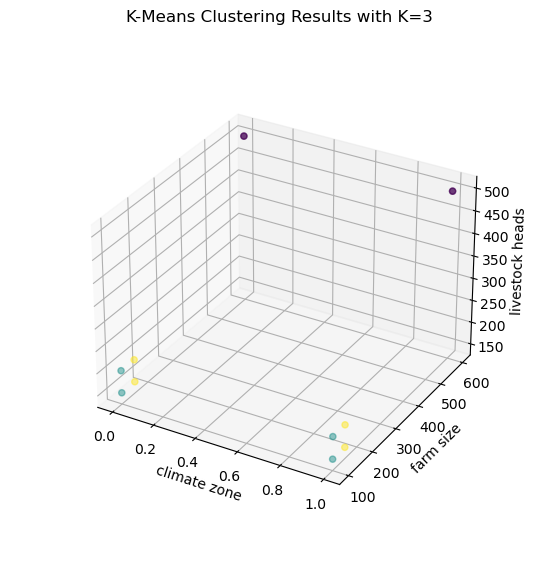

In [18]:
# 3D plot of clustered farm-data: 3 clusters
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(farm_data_df_classified['climateZone'], farm_data_df_classified['farmSize'], farm_data_df_classified['livestockHeads'], marker='o', c=farm_data_df_classified['class_3'], alpha=0.5)

ax.set_xlabel('climate zone')
ax.set_ylabel('farm size')
ax.set_zlabel('livestock heads')
ax.set_title("K-Means Clustering Results with K=3")

ax.set_box_aspect(aspect=None, zoom=0.8)

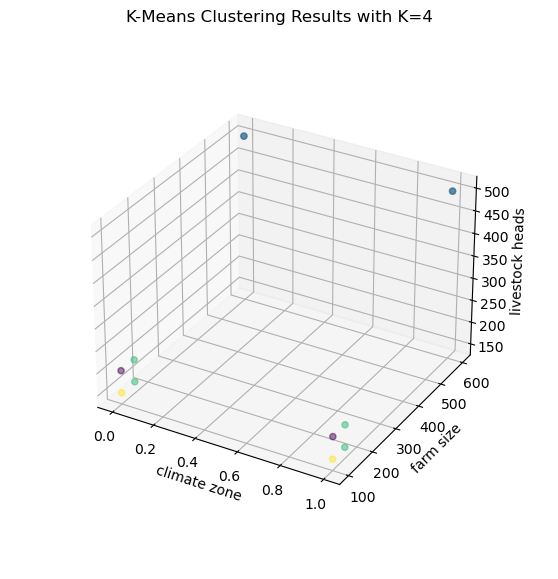

In [20]:
# 3D plot of clustered farm-data: 4 clusters
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

ax.scatter(farm_data_df_classified['climateZone'], farm_data_df_classified['farmSize'], farm_data_df_classified['livestockHeads'], marker='o', c=farm_data_df_classified['class_4'], alpha=0.5)

ax.set_xlabel('climate zone')
ax.set_ylabel('farm size')
ax.set_zlabel('livestock heads')
ax.set_title("K-Means Clustering Results with K=4")

ax.set_box_aspect(aspect=None, zoom=0.8)

The table below shows the results of the k-means clustering for 2, 3, and 4 clusters. It also displays the results from 3 students that were classified the farms into different groups during a tutorial of this course. The students thereby gave the following reasoning for why they came up with the groups they chose:
- Student 1: Three groups - Major differences in livestock densities (i.e. the ratio of livestock heads over farm size) -> disregarding climate zones
- Student 2: Five groups - Eyeballing major differences in farm size and livestock heads -> disregarding climate zones
- Student 3: Six groups - All systematic differences in climate zones and farm size -> disregarding livestock heads

In [19]:
farm_data_df_classified['class_3'] = list( kmeans_cl3.labels_ )
farm_data_df_classified['class_4'] = list( kmeans_cl4.labels_ )
# student 1; 3 groups; logic: groups according to major differences in livestock density (ratio of livestock heads over farm size) -> disregarding climate
farm_data_df_classified['student_1'] = [1,2,1,1,3,3,1,2,1,1,3,3]
# student 2; 5 groups; logic: groups according to farm size and livestock heads -> disregarding climate
farm_data_df_classified['student_2'] = [1,2,3,4,5,5,1,2,3,4,5,5]
# student 3; 6 groups; logic: groups according to climate & farm size -> disregarding livestock heads
farm_data_df_classified['student_3'] = [1,1,2,2,3,3,4,4,5,5,6,6]

farm_data_df_classified

,climateZone,farmSize,livestockHeads,class_2,class_3,class_4,student_1,student_2,student_3
0,0,100,150,1,1,3,1,1,1
1,0,100,200,1,1,0,2,2,1
2,0,150,200,1,2,2,1,3,2
3,0,150,150,1,2,2,1,4,2
4,0,600,500,0,0,1,3,5,3
5,0,600,500,0,0,1,3,5,3
6,1,100,150,1,1,3,1,1,4
7,1,100,200,1,1,0,2,2,4
8,1,150,200,1,2,2,1,3,5
9,1,150,150,1,2,2,1,4,5


### Student question
Compare the clustering solutions from the k-means algorithm to the student solutions.
- Is any of the k-means clustering solutions similar to any of the student solutions?
- In the above text it was identified that each of the students chose to disregard one of the dimensions as irrelevant. It seems that the k-means algorithm is likewise systematically disregarding the differences in climate zones. Do you have an idea of why this is the case?

<details>
    <summary>Click <font color="red"><b>here</b></font> to reveal the answer!</summary>

- None of the clustering solutions from the k-means algorithm is fully corresponding to any of the student solutions. There are however some similarities in some overall patterns - e.g., between class_3 and student_3.

- The k-means algorithm in principle considers all variables that we provide to it. Thus, it is not the case that the climate zone would be outright disregarded by the k-means clustering (as student_1 & student_2 chose to do). However, the k-means algorithm treats the scales of all provided variables as comparable. Thus, the climate zone (which only varies by a value of 1) never manages to have any weight in the overall decision of grouping points into clusters, as both farm size and herd size vary by so much higher values (i.e., by 500 hectares and 350 heads at largest).

This is an undesireable situation. The difference in the value of the climate zone (between 0 and 1) identifies a major qualitative difference. It should not have the same importance as when two farms vary by a farm size of 1 ha or livestock ownership of 1 head. One alternative approach is to give the overall observed data range of every variable the same weight. This can be achieved by **standardisation**.
</details>

## Standardisation
In layman's terms, standardisation is the process of **putting variables on the same scale** to make their values directly **comparable**. Standardisation gives the same meaning to the observed full value range of different variables. Take the above example of the three variables *climateZone*, *farmSize*, and *livestockHeads*. They all have a different value range (= |max| - |min|) of 1, 500, and 350 respectively. They also have different mean values of 0.5, 283.3, and 283.3 (That the average of farm-size & livestock heads is identical in this example is a coincidence). **After standardisation, both the value range and mean value will be identical for all variables.**

In more technical terms, standardization is the process of transforming a variable to observing a mean of 0 and a standard deviation of 1. E.g., consider we want to transform variable X that has a mean of $\mu$ and a standard deviation of $\sigma$. By standardisation, we want to derive a variable Z with a mean of 0 and standard deviation of 1.  

**X ~ ($\mu$, $\sigma$) -> Z ~ (0, 1)**

To achieve this, we can use the below simple formula: **From each value of X, we subtract the mean and devide by the standard deviation.**

**Z = (X - $\mu$) / $\sigma$)**

As standardisation is a routine transformation that is often required in statistics, there is no need to conduct this simple calculation manually, but one can use the existing short-hand function **StandardScaler** from the **scikit-learn** software-package.

In [26]:
# standardising the farm dataset
scaler = StandardScaler()
farm_data_np_std = scaler.fit_transform(farm_data_df)

# reformat numpy-array to pandas-dataframe
farm_data_df_std = pd.DataFrame({
    'climateZone': farm_data_np_std[:, 0], 
    'farmSize': farm_data_np_std[:, 1],
    'livestockHeads': farm_data_np_std[:, 2],
    })

farm_data_df_std

,climateZone,farmSize,livestockHeads
0,-1.0,-0.815374,-0.862662
1,-1.0,-0.815374,-0.539164
2,-1.0,-0.592999,-0.539164
3,-1.0,-0.592999,-0.862662
4,-1.0,1.408374,1.401826
5,-1.0,1.408374,1.401826
6,1.0,-0.815374,-0.862662
7,1.0,-0.815374,-0.539164
8,1.0,-0.592999,-0.539164
9,1.0,-0.592999,-0.862662


### Student question
Inspect the above table with regard to the changed values of the standardised variables:
- Describe, how do they differ from the previous, non-standardised values?
- Are they according to expectations for standardised values?

Let us now rerun the above k-means clustering for 2, 3, and 4 groups on the standardized dataset.

In [25]:
# k-means clustering: 2 clusters
kmeans_cl2_std = KMeans(n_clusters=2,
                init='k-means++',
                n_init=20,
                random_state=2).fit(farm_data_df_std)

# k-means clustering: 3 clusters
kmeans_cl3_std = KMeans(n_clusters=3,
                init='k-means++',
                n_init=20,
                random_state=2).fit(farm_data_df_std)

# k-means clustering: 4 clusters
kmeans_cl4_std = KMeans(n_clusters=4,
                init='k-means++',
                n_init=20,
                random_state=2).fit(farm_data_df_std)

# add classification results to dataframe
farm_data_df_classified['class_2_std'] = list( kmeans_cl2_std.labels_ )
farm_data_df_classified['class_3_std'] = list( kmeans_cl3_std.labels_ )
farm_data_df_classified['class_4_std'] = list( kmeans_cl4_std.labels_ )

farm_data_df_classified

,climateZone,farmSize,livestockHeads,class_2,class_3,class_4,student_1,student_2,student_3,class_2_std,class_3_std,class_4_std
0,0,100,150,1,1,3,1,1,1,1,1,1
1,0,100,200,1,1,0,2,2,1,1,1,1
2,0,150,200,1,2,2,1,3,2,1,1,1
3,0,150,150,1,2,2,1,4,2,1,1,1
4,0,600,500,0,0,1,3,5,3,0,0,0
5,0,600,500,0,0,1,3,5,3,0,0,0
6,1,100,150,1,1,3,1,1,4,1,2,2
7,1,100,200,1,1,0,2,2,4,1,2,2
8,1,150,200,1,2,2,1,3,5,1,2,2
9,1,150,150,1,2,2,1,4,5,1,2,2


### Student question
Compare the results of the k-means clustering using (i) nominal values (columns: class_2, class_3, class_4) with those using standardised values (columns: class_2_std, class_3_std, class_4_std).

- Which results are identical, which results are different?
- Specifically compare class_4 and class_4_std: describe the major discrepancies and explain what has caused them.